In [15]:
import glob

all_csv_files = glob.glob("data/*.csv")  # ✅ 경로 수정
filtered_files = [file for file in all_csv_files if any(year in file for year in ["2020", "2021", "2022", "2023"])]

for file in filtered_files:
    print(file)

data\경찰청_음주운전적발기록_2020.csv
data\경찰청_음주운전적발기록_2021.csv
data\경찰청_음주운전적발기록_2022.csv
data\경찰청_음주운전적발기록_2023.csv


In [13]:
# 파일 경로 정확하게 확인
import os
print(os.getcwd())

C:\Users\ska12\OneDrive\Desktop\workspace\미드 프로젝트\lion_mid_data07


In [37]:
import pandas as pd

dfs = {}

for file in filtered_files:
    df = None
    year = file[-8:-4]  # 연도 추출

    try:
        # 연도별 구분자 다르게 설정
        if year in ["2020", "2021"]:
            df = pd.read_csv(file, encoding="cp949", sep="\t")
        else:
            df = pd.read_csv(file, encoding="cp949")  # 쉼표 구분이므로 sep 생략 가능
    except:
        try:
            if year in ["2020", "2021"]:
                df = pd.read_csv(file, encoding="utf-16", sep="\t")
            else:
                df = pd.read_csv(file, encoding="utf-8-sig")
        except:
            print(f"❌ 실패: {file}")
            continue

    if df is not None:
        var_name = f"df_{year}"
        dfs[var_name] = df
        globals()[var_name] = df
        print(f"✅ {var_name} 불러오기 성공, shape = {df.shape}")

✅ df_2020 불러오기 성공, shape = (89403, 6)
✅ df_2021 불러오기 성공, shape = (113172, 6)
✅ df_2022 불러오기 성공, shape = (127524, 6)
✅ df_2023 불러오기 성공, shape = (125231, 8)


In [39]:
merged_df.head()  # 데이터 일부 미리 보기
merged_df.shape   # 총 행/열 개수 확인

(455330, 8)

In [41]:
for name, df in dfs.items():
    print(f"{name}: {df.columns.tolist()}")

df_2020: ['성별', '적발횟수', '나이', '알콜농도', '측정일시', '관할경찰서']
df_2021: ['성별', '적발횟수', '나이', '알콜농도', '측정일시', '관할경찰서']
df_2022: ['성별', '적발횟수', '나이', '알콜농도', '측정일시', '관할경찰서']
df_2023: ['연번', '성별', '적발횟수', '나이', '알콜농도', '측정거부', '측정일시', '관할경찰서']


In [43]:
display(df_2020)
display(df_2021)
display(df_2022)
display(df_2023)

,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서
0,남자,1,37,0.097,2020-04-01 00:02,안양동안경찰서
1,남자,1,29,0.045,2020-04-01 00:03,인천미추홀경찰서
2,여자,1,40,0.083,2020-04-01 00:03,제주동부경찰서
3,남자,1,29,0.124,2020-04-01 00:06,서울동작경찰서
4,여자,1,40,0.156,2020-04-01 00:11,서울강남경찰서
...,...,...,...,...,...,...
89398,남자,1,44,0.051,2020-12-31 23:47,원주경찰서
89399,여자,1,46,0.14,2020-12-31 23:49,시흥경찰서
89400,남자,1,45,0.129,2020-12-31 23:52,대구달서경찰서
89401,여자,1,56,0.126,2020-12-31 23:54,서산경찰서


,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서
0,남자,1,25,0.051,2021-01-01 00:01,포천경찰서
1,남자,1,62,0.099,2021-01-01 00:02,대전대덕경찰서
2,남자,1,44,0.082,2021-01-01 00:04,서울송파경찰서
3,남자,1,40,0.067,2021-01-01 00:05,울산울주경찰서
4,여자,1,54,0.143,2021-01-01 00:08,철원경찰서
...,...,...,...,...,...,...
113167,여자,1,46,0.076,2021-12-31 23:47,광양경찰서
113168,남자,1,46,0.052,2021-12-31 23:51,전주완산경찰서
113169,남자,1,56,0.061,2021-12-31 23:51,속초경찰서
113170,남자,1,54,측정거부,2021-12-31 23:57,김해중부경찰서


,성별,적발횟수,나이,알콜농도,측정일시,관할경찰서
0,남자,1,43,0.217,2022/01/01 00:02:00,음성경찰서
1,남자,1,43,0.097,2022/01/01 00:02:00,대전둔산경찰서
2,남자,1,27,0.128,2022/01/01 00:04:00,서울마포경찰서
3,남자,1,28,0.186,2022/01/01 00:05:00,홍천경찰서
4,남자,1,44,0.061,2022/01/01 00:05:00,분당경찰서
...,...,...,...,...,...,...
127519,남자,1,29,0.101,2022/12/31 23:54:00,아산경찰서
127520,남자,1,25,0.185,2022/12/31 23:55:00,부산동래경찰서
127521,남자,1,49,0.072,2022/12/31 23:55:00,예산경찰서
127522,남자,1,55,0.123,2022/12/31 23:56:00,인천연수경찰서


,연번,성별,적발횟수,나이,알콜농도,측정거부,측정일시,관할경찰서
0,1,남자,1,31,0.136,N,2023/01/01 00:03:00,수원남부경찰서
1,2,남자,3,56,0.065,N,2023/01/01 00:04:00,일산동부경찰서
2,3,남자,1,34,0.094,N,2023/01/01 00:06:00,수원서부경찰서
3,4,남자,1,35,0.191,N,2023/01/01 00:10:00,분당경찰서
4,5,남자,1,28,0.043,N,2023/01/01 00:13:00,천안서북경찰서
...,...,...,...,...,...,...,...,...
125226,125227,남자,1,61,0.063,N,2023/12/31 23:54:00,안동경찰서
125227,125228,남자,1,34,0.144,N,2023/12/31 23:54:00,양주경찰서
125228,125229,남자,4,43,0.236,N,2023/12/31 23:55:00,울진경찰서
125229,125230,남자,2,40,0.168,N,2023/12/31 23:56:00,진해경찰서


### 그 다음으로 필요한 부분
- 각 불러온 컬럼의 공통된 부분이 어떤 것들이 있는지 파악하여 공통된 부분의 컬럼만 불러온다.
- 따라서 먼저 공통 컬럼을 추출하고 공통된 컬럴만 남겨서 병합한다.

In [46]:
common_cols = set(df_2020.columns) & set(df_2021.columns) & set(df_2022.columns) & set(df_2023.columns)
print("📌 공통 컬럼:", common_cols)

📌 공통 컬럼: {'나이', '관할경찰서', '성별', '적발횟수', '알콜농도', '측정일시'}


In [49]:
# 공통 컬럼만 남기기
df_2020 = df_2020[list(common_cols)]
df_2021 = df_2021[list(common_cols)]
df_2022 = df_2022[list(common_cols)]
df_2023 = df_2023[list(common_cols)]

In [51]:
display(df_2020)
display(df_2021)
display(df_2022)
display(df_2023)

,나이,관할경찰서,성별,적발횟수,알콜농도,측정일시
0,37,안양동안경찰서,남자,1,0.097,2020-04-01 00:02
1,29,인천미추홀경찰서,남자,1,0.045,2020-04-01 00:03
2,40,제주동부경찰서,여자,1,0.083,2020-04-01 00:03
3,29,서울동작경찰서,남자,1,0.124,2020-04-01 00:06
4,40,서울강남경찰서,여자,1,0.156,2020-04-01 00:11
...,...,...,...,...,...,...
89398,44,원주경찰서,남자,1,0.051,2020-12-31 23:47
89399,46,시흥경찰서,여자,1,0.14,2020-12-31 23:49
89400,45,대구달서경찰서,남자,1,0.129,2020-12-31 23:52
89401,56,서산경찰서,여자,1,0.126,2020-12-31 23:54


,나이,관할경찰서,성별,적발횟수,알콜농도,측정일시
0,25,포천경찰서,남자,1,0.051,2021-01-01 00:01
1,62,대전대덕경찰서,남자,1,0.099,2021-01-01 00:02
2,44,서울송파경찰서,남자,1,0.082,2021-01-01 00:04
3,40,울산울주경찰서,남자,1,0.067,2021-01-01 00:05
4,54,철원경찰서,여자,1,0.143,2021-01-01 00:08
...,...,...,...,...,...,...
113167,46,광양경찰서,여자,1,0.076,2021-12-31 23:47
113168,46,전주완산경찰서,남자,1,0.052,2021-12-31 23:51
113169,56,속초경찰서,남자,1,0.061,2021-12-31 23:51
113170,54,김해중부경찰서,남자,1,측정거부,2021-12-31 23:57


,나이,관할경찰서,성별,적발횟수,알콜농도,측정일시
0,43,음성경찰서,남자,1,0.217,2022/01/01 00:02:00
1,43,대전둔산경찰서,남자,1,0.097,2022/01/01 00:02:00
2,27,서울마포경찰서,남자,1,0.128,2022/01/01 00:04:00
3,28,홍천경찰서,남자,1,0.186,2022/01/01 00:05:00
4,44,분당경찰서,남자,1,0.061,2022/01/01 00:05:00
...,...,...,...,...,...,...
127519,29,아산경찰서,남자,1,0.101,2022/12/31 23:54:00
127520,25,부산동래경찰서,남자,1,0.185,2022/12/31 23:55:00
127521,49,예산경찰서,남자,1,0.072,2022/12/31 23:55:00
127522,55,인천연수경찰서,남자,1,0.123,2022/12/31 23:56:00


,나이,관할경찰서,성별,적발횟수,알콜농도,측정일시
0,31,수원남부경찰서,남자,1,0.136,2023/01/01 00:03:00
1,56,일산동부경찰서,남자,3,0.065,2023/01/01 00:04:00
2,34,수원서부경찰서,남자,1,0.094,2023/01/01 00:06:00
3,35,분당경찰서,남자,1,0.191,2023/01/01 00:10:00
4,28,천안서북경찰서,남자,1,0.043,2023/01/01 00:13:00
...,...,...,...,...,...,...
125226,61,안동경찰서,남자,1,0.063,2023/12/31 23:54:00
125227,34,양주경찰서,남자,1,0.144,2023/12/31 23:54:00
125228,43,울진경찰서,남자,4,0.236,2023/12/31 23:55:00
125229,40,진해경찰서,남자,2,0.168,2023/12/31 23:56:00


In [55]:
# 병합하기
merged_df = pd.concat([df_2020, df_2021, df_2022, df_2023], ignore_index=True)
merged_df

,나이,관할경찰서,성별,적발횟수,알콜농도,측정일시
0,37,안양동안경찰서,남자,1,0.097,2020-04-01 00:02
1,29,인천미추홀경찰서,남자,1,0.045,2020-04-01 00:03
2,40,제주동부경찰서,여자,1,0.083,2020-04-01 00:03
3,29,서울동작경찰서,남자,1,0.124,2020-04-01 00:06
4,40,서울강남경찰서,여자,1,0.156,2020-04-01 00:11
...,...,...,...,...,...,...
455325,61,안동경찰서,남자,1,0.063,2023/12/31 23:54:00
455326,34,양주경찰서,남자,1,0.144,2023/12/31 23:54:00
455327,43,울진경찰서,남자,4,0.236,2023/12/31 23:55:00
455328,40,진해경찰서,남자,2,0.168,2023/12/31 23:56:00


✅ 지금부터 할 작업 순서
✅ 측정일시 컬럼을 datetime으로 변환

✅ 측정일시에서 시간(hour)만 추출

✅ 도수분포표(=히스토그램)로 시간대 분포 시각화

✅ 분포를 기반으로 시간대 구간 설정 논의

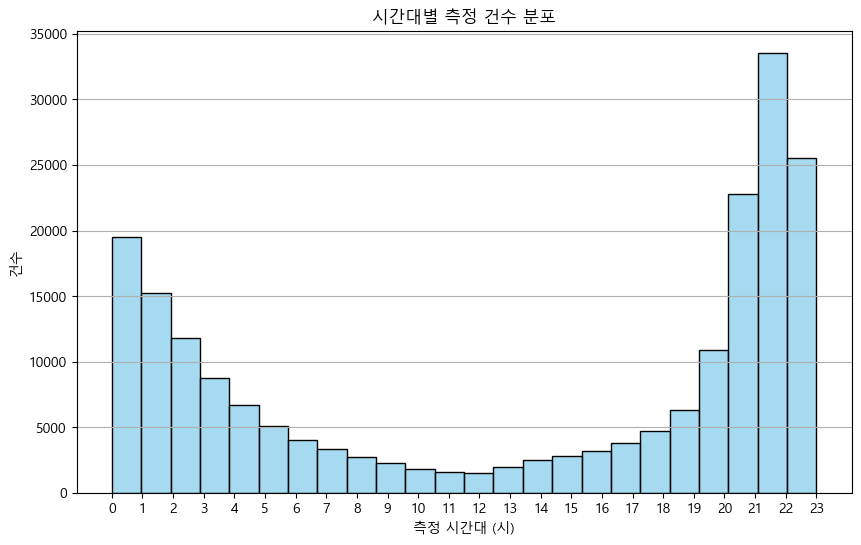

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 등 한글 가능한 폰트 지정 (Windows 기본 폰트 중 하나)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 1. datetime 형식으로 변환
merged_df['측정일시'] = pd.to_datetime(merged_df['측정일시'], errors='coerce')

# 2. 시간대 추출 (0~23시)
merged_df['측정_시간'] = merged_df['측정일시'].dt.hour

# 3. 도수분포 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='측정_시간', bins=24, kde=False, color='skyblue')
plt.title('시간대별 측정 건수 분포')
plt.xlabel('측정 시간대 (시)')
plt.ylabel('건수')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

✅ 분석 목표 정리
측정_시간 기준으로

해당 시간에 측정된 알콜농도들의 분포를 확인하고

평균 알콜 농도를 구해서

시간대별로 비교 가능한 테이블이나 그래프로 정리

In [65]:
# 알콜농도 컬럼이 문자열로 되어 있다면 수치형(float)으로 변환
merged_df['알콜농도'] = pd.to_numeric(merged_df['알콜농도'], errors='coerce')

In [67]:
# 시간대별 평균 계산
avg_by_hour = merged_df.groupby('측정_시간')['알콜농도'].mean().reset_index()

# 확인
display(avg_by_hour)

,측정_시간,알콜농도
0,0.0,0.125296
1,1.0,0.125780
2,2.0,0.125485
3,3.0,0.124267
4,4.0,0.122382
5,5.0,0.118446
6,6.0,0.116239
7,7.0,0.108754
8,8.0,0.109673
9,9.0,0.110107


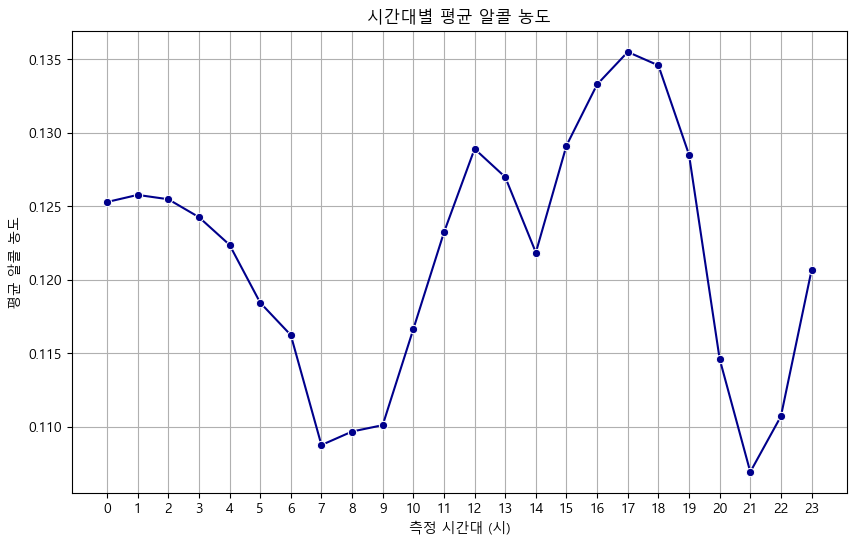

In [71]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_by_hour, x='측정_시간', y='알콜농도', marker='o', color='darkblue')
plt.title('시간대별 평균 알콜 농도')
plt.xlabel('측정 시간대 (시)')
plt.ylabel('평균 알콜 농도')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

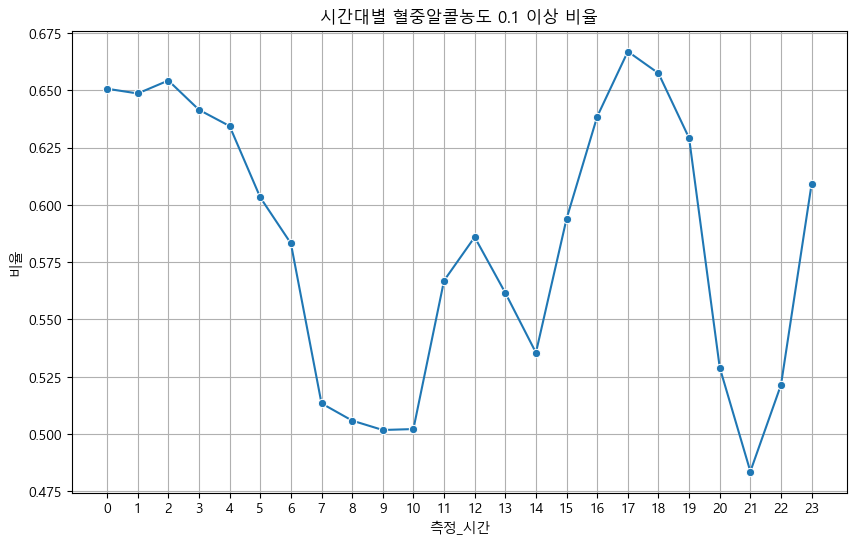

In [75]:
# 술을 진짜 많이 마신 사람들의 비율 기반 분포 분석
merged_df['고알콜'] = merged_df['알콜농도'] >= 0.1
high_ratio = merged_df.groupby('측정_시간')['고알콜'].mean().reset_index()

# 시각화
plt.figure(figsize=(10,6))
sns.lineplot(data=high_ratio, x='측정_시간', y='고알콜', marker='o')
plt.title('시간대별 혈중알콜농도 0.1 이상 비율')
plt.ylabel('비율')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

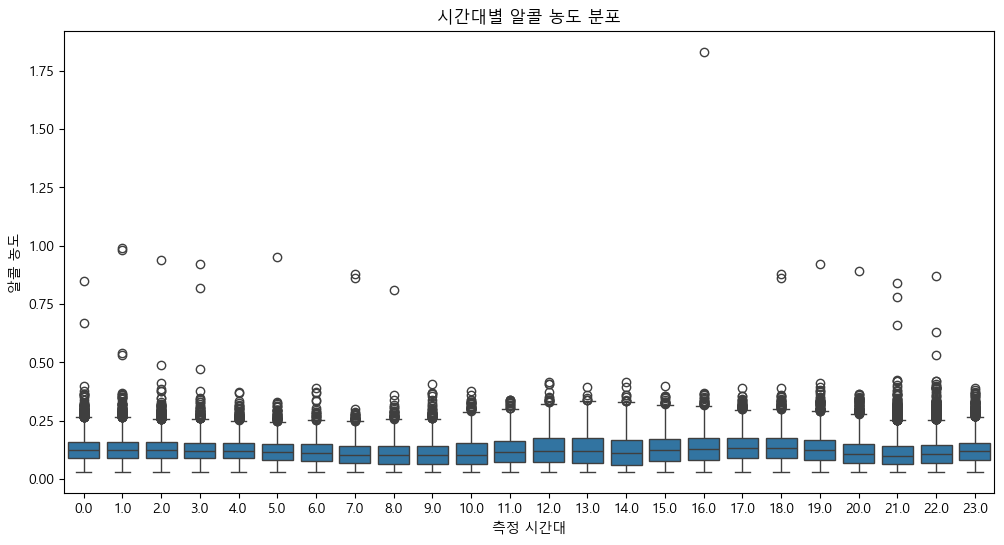

In [77]:
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df, x='측정_시간', y='알콜농도')
plt.title('시간대별 알콜 농도 분포')
plt.xlabel('측정 시간대')
plt.ylabel('알콜 농도')
plt.show()

### 아침 시간대는 음주운전 적발 건수는 많은데, 측정된 혈중 알코올 농도는 낮은 편일까?

In [82]:
# 날짜 문자열을 datetime 타입으로 변환하고, 시간만 추출
merged_df['측정일시'] = pd.to_datetime(merged_df['측정일시'], errors='coerce')  # 혹시 모를 에러 처리 포함
merged_df['측정시각'] = merged_df['측정일시'].dt.hour  # 시각(0~23시)만 추출

In [88]:
# 보통 아침 출근 시간인 6 ~ 10시로 설정한다.
# 아침 시간대: 06시 ~ 10시
# 아침 시간대: 06시 ~ 10시
morning_df = merged_df[(merged_df['측정시각'] >= 6) & (merged_df['측정시각'] <= 10)]

# 나머지 시간대
other_df = merged_df[(merged_df['측정시각'] < 6) | (merged_df['측정시각'] > 10)]

In [90]:
print("아침 시간대 건수:", len(morning_df))
print("나머지 시간대 건수:", len(other_df))
print("아침 시간대 평균 알콜농도:", morning_df['알콜농도'].mean())
print("나머지 시간대 평균 알콜농도:", other_df['알콜농도'].mean())

아침 시간대 건수: 14216
나머지 시간대 건수: 188359
아침 시간대 평균 알콜농도: 0.11228389339513327
나머지 시간대 평균 알콜농도: 0.11960837756419453
